## Overfitting in deep decision trees

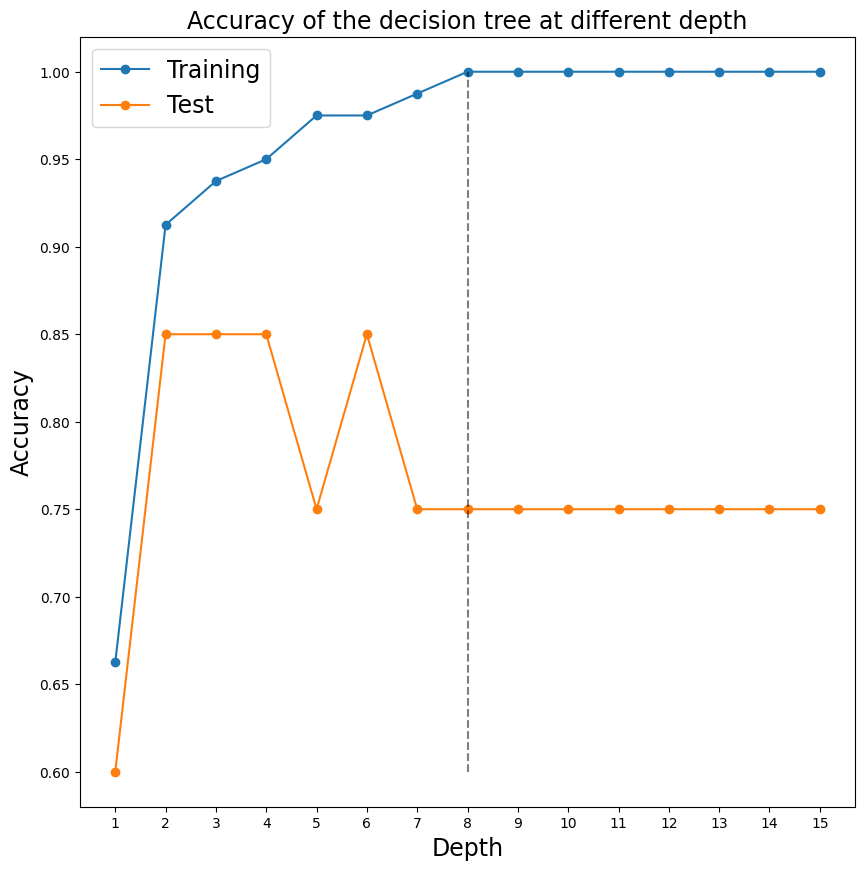

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_classes = 3, random_state = 10,
                           flip_y = 0.02, class_sep = 1, n_clusters_per_class = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

# decision Tree Classifier
clff = DecisionTreeClassifier(random_state = 12)
clff.fit(X_train, y_train)

# max_depth will be set upto 15
depth = 15

clfs = []
train_accuracy = []
testing_accuracy = []

# train decision tree classifiers with max_depth set to 1, 2, 3, ..., 15 ##
for i in range(depth):
    clf = DecisionTreeClassifier(random_state=12, max_depth = i+1)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_accuracy = [clf.score(X_train, y_train) for clf in clfs]
testing_accuracy = [clf.score(X_test, y_test) for clf in clfs]

# Plot of depth vs accuracy ##
plt.figure(figsize = (10,10))
plt.plot(np.arange(1, depth+1, 1), train_accuracy, marker = 'o', label = 'Training')
plt.plot(np.arange(1, depth+1, 1), testing_accuracy, marker = 'o', label = "Test")
plt.plot([8,8], [0.6, 1.0], '--', color = 'black', alpha = 0.5)
plt.xlabel("Depth", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)
plt.title("Accuracy of the decision tree at different depth", fontsize = 17)
plt.xticks(np.arange(1, depth+1, 1))
plt.yticks(np.arange(0.6, 1.05, 0.05))
plt.legend(fontsize = 17)
plt.show()